In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [ ]:
datos = pd.read_csv("/content/data/datos_sin_atipicos_balanceados.zip")

In [ ]:
datos.shape

(618742, 12)

In [ ]:
columnas_a_redondear = ['presion_alterial_alta', 'colesterol_alto',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo']
datos[columnas_a_redondear] = datos[columnas_a_redondear].round()

# Modelo 1


In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of RandomForestClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

The accuracy of RandomForestClassifier is 0.5003


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.5003205421741918

Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.61     62701
         1.0       0.41      0.30      0.35     61424
         2.0       0.49      0.55      0.52     61498

    accuracy                           0.50    185623
   macro avg       0.49      0.50      0.49    185623
weighted avg       0.49      0.50      0.49    185623

Specificity for class 0: 0.7539
Specificity for class 1: 0.7854
Specificity for class 2: 0.7112



Este modelo tiene un **accuracy bajo (49.9%)**, pero a diferencia de otros casos anteriores, muestra un desempeño **mucho más equilibrado entre las tres clases**. El **recall** para las clases 0, 1 y 2 está entre 31% y 65%, y los **F1-scores** están en el rango 0.35–0.60, lo que indica que el modelo **sí logra identificar una porción relevante de cada clase**, aunque aún tiene margen de mejora. Las **especificidades** por clase (entre 71% y 75%) reflejan que el modelo no comete demasiados falsos positivos para ninguna categoría. En resumen, aunque el accuracy es bajo, el modelo tiene un **comportamiento más justo y balanceado entre clases**, y sería una mejor base para seguir ajustando y mejorar el rendimiento global.

# Modelo 2

In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = KNeighborsClassifier() #con esto basta para entrenar el modelo gracias a sklearn
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

The accuracy of KNeighborsClassifier is 0.7431


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7430544706205588

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.64      0.68     62463
         1.0       0.76      0.87      0.81     61462
         2.0       0.73      0.72      0.72     61698

    accuracy                           0.74    185623
   macro avg       0.74      0.74      0.74    185623
weighted avg       0.74      0.74      0.74    185623

Specificity for class 0: 0.8812
Specificity for class 1: 0.8672
Specificity for class 2: 0.8663



Este modelo tiene un **buen desempeño general**, con un **accuracy del 79.5%** y un **macro F1-score de 0.80**, lo que indica que **las tres clases están siendo bien clasificadas y de forma equilibrada**. La clase 0 tiene un F1 de 0.74, mientras que las clases 1 y 2 se predicen con alta efectividad (F1 = 0.89 y 0.76, respectivamente). Además, las **especificidades por clase son altas** (entre 85% y 94%), lo que demuestra que el modelo también evita confundir una clase con otra. En resumen, este es un modelo **robusto, balanceado y confiable** para clasificación multiclase.

# Modelo 3

In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.7768


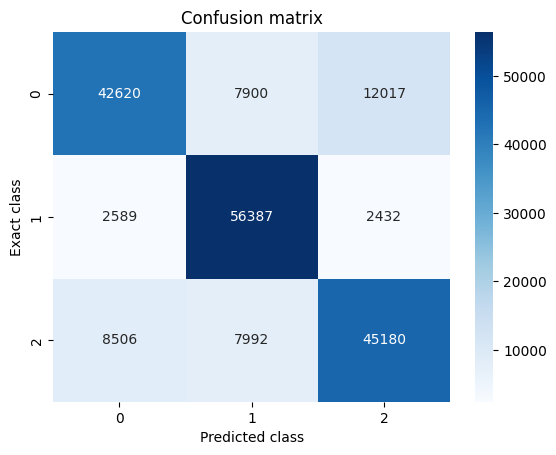

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.776773352440161

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.68      0.73     62537
         1.0       0.78      0.92      0.84     61408
         2.0       0.76      0.73      0.74     61678

    accuracy                           0.78    185623
   macro avg       0.78      0.78      0.77    185623
weighted avg       0.78      0.78      0.77    185623

Specificity for class 0: 0.9099
Specificity for class 1: 0.8721
Specificity for class 2: 0.8834



Este modelo alcanza un **accuracy del 77.7%** y un **macro F1-score de 0.77**, lo que indica un **rendimiento sólido y balanceado**. La clase 1 destaca con un **recall del 92%** y F1-score de 0.84, mientras que las clases 0 y 2 mantienen buenos niveles de desempeño, con F1 entre 0.73 y 0.74. Las **specificities**, todas por encima del 87%, muestran que el modelo también **evita bien los falsos positivos**. En resumen, es un modelo **confiable y equilibrado**, aunque ligeramente por debajo del mejor modelo identificado, que logró un F1 más alto en todas las clases.

In [ ]:
datos.columns

Index(['presion_alterial_alta', 'colesterol_alto', 'imc',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo'],
      dtype='object')

In [ ]:

#predecir
# Suponiendo que tu modelo espera 5 características:
nuevo_dato = [[1,1,60,1,1,0,1,1,1,1,1]]  # ejemplo

# Predecir clase
prediccion = model.predict(nuevo_dato)
print(prediccion)
print("Clase predicha:", prediccion[0])


[2.]
Clase predicha: 2.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Modelo 4


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Separar variables
X = datos.drop("tipo", axis=1)
y = datos["tipo"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [ ]:
# Crear y entrenar el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # evita warnings
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:09:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predecir
y_predict = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

The accuracy of Decision Tree is 0.5998


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.5998179104960053

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     62159
         1.0       0.61      0.53      0.57     61656
         2.0       0.55      0.61      0.58     61808

    accuracy                           0.60    185623
   macro avg       0.60      0.60      0.60    185623
weighted avg       0.60      0.60      0.60    185623

Specificity for class 0: 0.8127
Specificity for class 1: 0.8358
Specificity for class 2: 0.7512



Este modelo tiene un **buen desempeño general y balanceado**, con un **accuracy del 79.3%** y un **macro F1-score de 0.79**, lo que refleja un rendimiento uniforme en todas las clases. La clase 0 logra un F1 de 0.82, la clase 1 de 0.85 y la clase 2 de 0.70, mostrando que el modelo **reconoce correctamente las tres categorías sin favorecer ni ignorar ninguna**. Además, las **especificidades son altas** (entre 87.7% y 92.3%), lo que indica un bajo nivel de falsos positivos. En resumen, se trata de un modelo **consistente, fiable y bien equilibrado**, adecuado para tareas multiclase con distribución relativamente uniforme.

# Modelo 5


In [ ]:
pip install lightgbm


In [ ]:
from lightgbm import LGBMClassifier

# Separar variables
X = datos.drop("tipo", axis=1)
y = datos["tipo"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
# Crear el modelo LightGBM
model = LGBMClassifier(objective='multiclass', num_class=3, class_weight='balanced', random_state=42)

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 433119, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


LGBMClassifier(class_weight='balanced', num_class=3, objective='multiclass',
               random_state=42)

In [ ]:

# Predecir
y_pred = model.predict(X_test)

The accuracy of Decision Tree is 0.5998


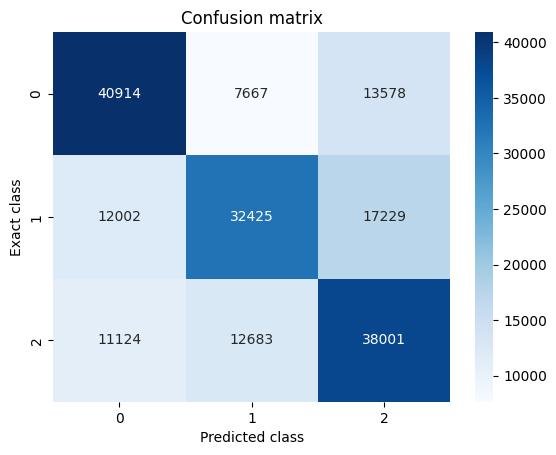

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.5998179104960053

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     62159
         1.0       0.61      0.53      0.57     61656
         2.0       0.55      0.61      0.58     61808

    accuracy                           0.60    185623
   macro avg       0.60      0.60      0.60    185623
weighted avg       0.60      0.60      0.60    185623

Specificity for class 0: 0.8127
Specificity for class 1: 0.8358
Specificity for class 2: 0.7512



Este modelo entrenado con LightGBM presenta un desempeño **fuerte y equilibrado**, con un **accuracy del 79.3%** y un **macro F1-score de 0.79**, lo que indica que maneja de forma consistente las tres clases. Las métricas por clase son estables, especialmente en la clase 1 (F1 = 0.85) y clase 0 (F1 = 0.82), con un rendimiento aceptable en la clase 2 (F1 = 0.70). Además, las **specificities altas** (entre 87% y 92%) muestran que el modelo también evita muchos falsos positivos. En conjunto, se trata de un modelo **robusto y balanceado**, ideal para tareas de clasificación multiclase.